In [153]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt
data = pd.read_csv("C:\\Users\\李乔乔\\Desktop\\数据分析大赛\\数据\\data6.csv",engine='python')

data.head(7)

,user_id,month,first_order_price,age_type,app_num,main_home,main_home2,mainpage,schoolreportpage,main_mime,...,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,province,cityrank,result
0,2000002496226200,J,0.0,年龄异常,1,78,122,30,26,7,...,1,1,2,2,1,0,0,福建,二线,0
1,2000002496238600,J,0.0,年龄异常,1,67,130,10,1,5,...,1,1,5,6,1,0,0,其他省份,其他,0
2,2000002452116010,D,0.0,年龄异常,1,64,38,6,1,1,...,1,1,4,4,0,0,0,重庆,一线,0
3,2000002415157110,D,0.0,年龄异常,1,75,51,11,2,0,...,1,1,5,5,0,0,0,重庆,一线,0
4,2000002874070500,A,0.0,年龄异常,1,0,31,0,0,1,...,1,1,1,1,0,0,0,福建,二线,0
5,2000002544497400,J,0.0,年龄异常,1,49,21,2,6,1,...,1,1,4,4,0,0,0,广东,三线,0
6,2000002419662880,D,1.0,年龄异常,1,55,50,0,0,0,...,1,1,2,2,1,1,0,广东,一线,1


In [170]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 30%用于测试集，70%用于训练集
train,test= train_test_split(data,test_size=0.30,random_state=20)


In [171]:
def get_y_train():
    y_train = np.array(train['result'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['result'])
 
    return y_test
 
def get_X_train():
    oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
    columns_size = oh_data.columns.size
    X_train = oh_data.iloc[:,1:columns_size-2] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    columns_size = oh_test.columns.size
    X_test = oh_test.iloc[:,1:columns_size-2] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


In [165]:
print('X_test.shape:'+str(X_test.shape))
print('X_train.shape:'+str(X_train.shape))
oh_data =pd.DataFrame( pd.get_dummies(train) )
oh_data.columns

X_test.shape:(40548, 93)
X_train.shape:(94611, 93)


Index(['user_id', 'first_order_price', 'app_num', 'main_home', 'main_home2',
       'mainpage', 'schoolreportpage', 'main_mime', 'lightcoursetab',
       'main_learnpark', 'partnergamebarrierspage', 'evaulationcenter',
       'coupon_visit', 'click_buy', 'progress_bar', 'ppt', 'task',
       'video_play', 'video_read', 'next_nize', 'answer_task',
       'chapter_module', 'course_tab', 'slide_subscribe', 'baby_info',
       'click_notunlocked', 'share', 'click_dialog', 'login_day',
       'login_diff_time', 'distance_day', 'login_time', 'launch_time',
       'chinese_subscribe_num', 'math_subscribe_num', 'add_friend',
       'add_group', 'camp_num', 'learn_num', 'finish_num', 'study_num',
       'coupon', 'course_order_num', 'result', 'month_A', 'month_D', 'month_F',
       'month_J', 'month_M', 'month_N', 'age_type_中老年人', 'age_type_儿童',
       'age_type_婴儿', 'age_type_少年', 'age_type_年龄异常', 'age_type_幼儿',
       'age_type_青年', 'province_上海', 'province_云南', 'province_其他省份',
       'provi

In [185]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn import metrics
 
 
model = Sequential()
model.add(Dense(93, input_dim = 93, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.Adam(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train,epochs = 15,  batch_size = 2520, validation_data = (X_test, y_test))

C:\shazi\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
38/38 [==============================] - 3s 30ms/step - loss: 0.3237 - accuracy: 0.8717 - val_loss: 0.0841 - val_accuracy: 0.9667
Epoch 2/15
38/38 [==============================] - 1s 15ms/step - loss: 0.0635 - accuracy: 0.9739 - val_loss: 0.0214 - val_accuracy: 0.9980
Epoch 3/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.0111 - val_accuracy: 0.9995
Epoch 4/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.0098 - val_accuracy: 0.9996
Epoch 5/15
38/38 [==============================] - 1s 14ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0093 - val_accuracy: 0.9997
Epoch 6/15
38/38 [==============================] - 1s 15ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0093 - val_accuracy: 0.9997
Epoch 7/15
38/38 [==============================] - 1s 15ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0086 - val_accuracy: 0.9997
Epoch 8/15
38

In [173]:
y_pred = model.predict_classes(X_test, batch_size = 20, verbose = 1)
print(y_pred)


C:\shazi\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2028/2028 [==============================] - 2s 766us/step
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [174]:
target_names = ['1', '0']
print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     39158
           0       1.00      0.99      1.00      1390

    accuracy                           1.00     40548
   macro avg       1.00      1.00      1.00     40548
weighted avg       1.00      1.00      1.00     40548



In [175]:
df1 = pd.DataFrame(y_pred)
df1

,0
0,0
1,1
2,0
3,0
4,0
...,...
40543,0
40544,0
40545,0
40546,0


In [182]:


history_dict = history.history
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
print(history_dict)
print(pd.DataFrame(history_dict))

1268/1268 [==============================] - 1s 1ms/step - loss: 0.0061 - accuracy: 0.9998
test loss:  0.0060811289586126804
test accuracy:  0.9998027086257935
{'loss': [0.18518613278865814, 0.05231325328350067, 0.01674746163189411, 0.0060782888904213905, 0.002443257486447692, 0.001970739336684346, 0.0010202896082773805, 0.0009189813863486052, 0.000665022642351687, 0.0005932155763730407, 0.00038088037399575114, 0.00031185595435090363, 0.00043788470793515444, 0.00020313329878263175, 0.00010181941615883261], 'accuracy': [0.9528278708457947, 0.9735654592514038, 0.9972202181816101, 0.9992706775665283, 0.9996406435966492, 0.9997780323028564, 0.9997463226318359, 0.9998626112937927, 0.999873161315918, 0.9998414516448975, 0.9999154210090637, 0.999936580657959, 0.9999154210090637, 0.9999471306800842, 0.9999894499778748], 'val_loss': [0.08089075982570648, 0.030243949964642525, 0.01472956221550703, 0.009619089774787426, 0.009119026362895966, 0.007318700663745403, 0.0070551722310483456, 0.00677804

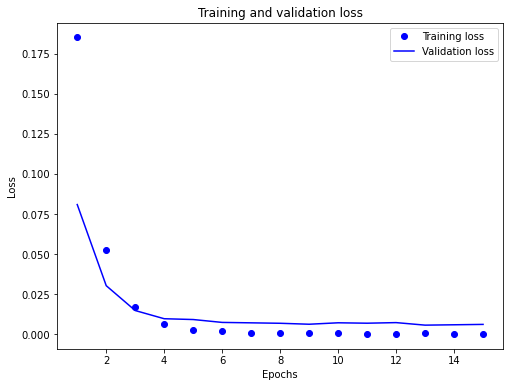

In [189]:
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']


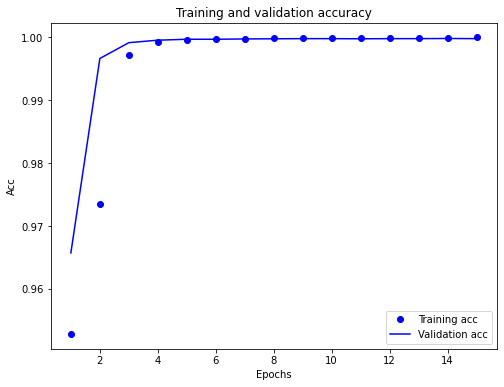

In [188]:
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [178]:
df3= pd.DataFrame(y_pred,y_test)
df3
df3.to_csv("out_result.csv")

In [187]:
print(pd.DataFrame(history_dict))
df4=pd.DataFrame(history_dict)
df4.to_csv("loss_accaa.csv")

        loss  accuracy  val_loss  val_accuracy
0   0.185186  0.952828  0.080891      0.965720
1   0.052313  0.973565  0.030244      0.996646
2   0.016747  0.997220  0.014730      0.999161
3   0.006078  0.999271  0.009619      0.999556
4   0.002443  0.999641  0.009119      0.999704
5   0.001971  0.999778  0.007319      0.999704
6   0.001020  0.999746  0.007055      0.999753
7   0.000919  0.999863  0.006778      0.999778
8   0.000665  0.999873  0.006183      0.999803
9   0.000593  0.999841  0.007080      0.999803
10  0.000381  0.999915  0.006825      0.999778
11  0.000312  0.999937  0.007195      0.999803
12  0.000438  0.999915  0.005616      0.999803
13  0.000203  0.999947  0.005842      0.999827
14  0.000102  0.999989  0.006081      0.999803


In [180]:
df5= pd.DataFrame(test)
df5
df5.to_csv("out_test.csv")

In [181]:
df6= pd.DataFrame(train)
df6
df6.to_csv("out_train.csv")

>>>特征权重值
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


IndexError: index 261 is out of bounds for axis 0 with size 49

In [97]:
data

,user_id,date,first_order_price,age_month,platform_num,model_num,app_num,main_home,main_home2,mainpage,...,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,province,cityrank,result
0,2000002633602140,2019/2/22,0.0,98,9.2969,4.587200,1,112,81,1,...,1,3,13,1,0,0,0,湖南,一线,0
1,2000001706256120,2019/2/20,0.0,46,13.5570,28.111601,1,2172,2685,2847,...,1,0,0,0,1,0,0,广东,一线,0
2,2000001916804340,2019/2/24,0.0,153,13.5570,10.896600,1,1565,2481,1266,...,1,0,0,0,0,1,0,广东,一线,1
3,2000002444906610,2018/12/23,0.0,5,9.2969,6.590300,1,381,687,154,...,1,4,6,0,0,0,8,山东,三线,0
4,2000002421083180,2018/12/14,0.0,74,9.2969,3.609600,1,181,190,24,...,1,1,5,5,1,0,2,重庆,一线,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135154,2000002938105530,2019/5/9,0.0,85,9.2969,1.546400,1,36,59,4,...,1,2,5,4,0,0,0,贵州,三线,0
135155,2000002938114370,2019/5/9,0.0,67,9.2969,15.415000,1,0,0,0,...,1,2,0,0,0,0,0,贵州,三线,0
135156,2000002938121220,2019/5/9,0.0,61,9.2969,4.115200,1,68,68,2,...,1,2,3,2,0,1,0,贵州,三线,0
135157,2000002938122380,2019/5/9,0.0,56,9.2969,13.239500,1,77,46,1,...,1,2,4,4,0,0,0,贵州,三线,0


In [99]:
 oh_data


NameError: name 'oh_data' is not defined

In [100]:
oh_data = pd.get_dummies(train)

In [102]:
oh_data.head(7)

,user_id,first_order_price,age_month,platform_num,model_num,app_num,main_home,main_home2,mainpage,schoolreportpage,...,province_重庆,province_陕西,province_青海,province_黑龙江,cityrank_一线,cityrank_三线,cityrank_二线,cityrank_五线,cityrank_其他,cityrank_四线
52421,2000002681789080,9.0,47,13.5570,5.6734,1,43,19,0,0,...,0,0,0,0,1,0,0,0,0,0
113474,2000002718163480,0.0,87,13.5570,10.4680,1,165,178,0,20,...,0,0,0,0,1,0,0,0,0,0
133204,2000002823407870,0.0,76,9.2969,3.3333,1,20,32,4,0,...,1,0,0,0,1,0,0,0,0,0
23794,2000002363636880,0.0,72,9.2969,5.6452,1,220,178,0,14,...,1,0,0,0,1,0,0,0,0,0
45025,2000002870021830,149.0,0,9.2969,0.0000,1,19,40,14,0,...,0,1,0,0,1,0,0,0,0,0
32673,2000002739917390,0.0,76,9.2969,6.5903,1,98,55,9,22,...,0,0,0,0,0,0,0,0,1,0
64765,2000002437762370,0.0,53,9.2969,11.3667,1,33,61,2,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test = get_weights()